<a href="https://colab.research.google.com/github/Seemab-zakir/Python-crash-course-file/blob/main/Cifar_dataset_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

50000 train samples
10000 test samples


In [ ]:
#print(x_test[0,:,:,0].shape)
#plt.imshow(x_test[2000,100:,:])#for 1 channel in matplotlib we put 0 in place of channel
#plt.show()

In [ ]:
num_classes=10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import AveragePooling2D

In [ ]:
model=tf.keras.models.Sequential([
    
    tf.keras.Input(shape=(32,32,3)),
    
    tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=5,
    strides=(1, 1),
    padding="valid",
    # bias_initializer='ones',
    # kernel_initializer='ones'
    ),#"same" means zero padding, 'valid' means 1 padding,

    tf.keras.layers.BatchNormalization(),#This layer should be inserted between the convolutional layer and the activation function
#mean of 0 and a standard deviation of 1 
   
    #tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    #tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="valid"),

    tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=5,
    strides=(1, 1),
    padding="valid"),
    
    #tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    #tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="valid"),
    tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=3,#height and weight is less then 5 so cant use size 5
    strides=(1, 1),
    padding="valid"),
    #tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"),

    tf.keras.layers.LeakyReLU(alpha=0.1),
    #tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="valid"),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128),
    
    #tf.keras.layers.ReLU(),

   tf.keras.layers.LeakyReLU(alpha=0.1),# the slope of the activation function will be 0.1 for x < 0.

    tf.keras.layers.Dense(10,activation='softmax'),
   # tf.keras.layers.Dropout(0.2)
    
    
     #sigmoid for binary
    #softmax multiclass

])

In [ ]:
model.build()

In [ ]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0

In [ ]:
model.layers[0].get_weights()[0]

array([[[[-0.04754369, -0.06526604, -0.02335522, ...,  0.00153833,
          -0.01606952,  0.06825368],
         [-0.04241369,  0.03463511,  0.01453216, ...,  0.01757518,
          -0.0318405 ,  0.03612074],
         [ 0.00944036, -0.05056936, -0.06102971, ...,  0.07508577,
           0.0747135 ,  0.08213468]],

        [[-0.04043088, -0.00077467,  0.06990185, ...,  0.01931212,
           0.07616155,  0.08163755],
         [-0.00279633, -0.07649735, -0.03968991, ..., -0.03165412,
           0.05243301,  0.05470063],
         [ 0.07630573, -0.0686711 , -0.04302165, ..., -0.01848953,
           0.00805456, -0.04784189]],

        [[-0.01510769, -0.02284133,  0.0341536 , ..., -0.0488319 ,
           0.03115626, -0.02222334],
         [ 0.00027936,  0.0805369 ,  0.03447065, ...,  0.0696056 ,
           0.04456249,  0.00032173],
         [-0.01235139, -0.05074434, -0.00193895, ...,  0.06782678,
           0.00080837,  0.00221567]],

        [[ 0.07701367,  0.03387714, -0.04061299, ..., -0.0

In [ ]:
model.layers[0].get_weights()[0].max(),model.layers[0].get_weights()[0].min()

(0.08267845, -0.082772724)

In [ ]:
model.fit(x_train,y_train,epochs=3,batch_size=24,validation_data=(x_test,y_test))

Epoch 1/3
2084/2084 [==============================] - 18s 5ms/step - loss: 1.5199 - accuracy: 0.4523 - val_loss: 1.6166 - val_accuracy: 0.4488
Epoch 2/3
2084/2084 [==============================] - 10s 5ms/step - loss: 1.1497 - accuracy: 0.5941 - val_loss: 1.2186 - val_accuracy: 0.5809
Epoch 3/3
2084/2084 [==============================] - 9s 4ms/step - loss: 0.9842 - accuracy: 0.6592 - val_loss: 1.1221 - val_accuracy: 0.6176


In [ ]:
model.layers[0].get_weights()[0].max(),model.layers[0].get_weights()[0].min()

(0.31536654, -0.34129483)

In [ ]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 10))

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1221 - accuracy: 0.6176


[1.122146487236023, 0.6176000237464905]

In [ ]:
pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_score=model.predict(x_test)
print(y_score.shape)
y_pred=np.argmax(y_score,axis=1)#return col which has max value
y_test=np.argmax(y_test,axis=1)#axis 0=rows and axis 1=col


313/313 [==============================] - 1s 2ms/step
(10000, 10)


In [ ]:
y_test.shape

(10000,)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68      1000
           1       0.83      0.73      0.78      1000
           2       0.61      0.42      0.50      1000
           3       0.45      0.43      0.44      1000
           4       0.41      0.78      0.54      1000
           5       0.48      0.67      0.56      1000
           6       0.86      0.44      0.58      1000
           7       0.63      0.73      0.68      1000
           8       0.79      0.72      0.75      1000
           9       0.82      0.62      0.71      1000

    accuracy                           0.62     10000
   macro avg       0.66      0.62      0.62     10000
weighted avg       0.66      0.62      0.62     10000



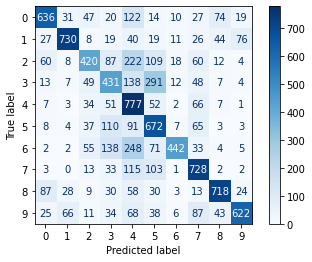

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm
                               )
disp.plot(cmap='Blues')
plt.show()